### API Data Report
Jaclyn Bell</br>
10-12-2025

### Hypothesis
Posts with hashtags get higher visibility (likes + reposts) than posts without hashtags.
### Theoretical Application
Hashtags increase the change for posts to be seen outside of a follower base. I search hashtags to narrow down my search, and often come across new content I wouldn't have seen otherwise.

### Statisitcal Application
I am hoping to be able to test this by:
- checking for the presence of hashtags
- looking at the engagement of likes and reposts
- I can analyze it by calculating average engagement for hashtag vs non-hashtag posts
- I do a t-test to show show the results visually in a bar chart.

### Bluesky API endpoints

I am going to do this by using public endpoints. I will try to get this data by using these endpoints:

1. app.bsky.feed.searchPosts- to let me find posts using hashtag terms. With fields like, likeCount, repostCount, and replyCount.
2. app.bsky.feed.getPosts- I will us the URIs to get more detail of posts engagement numbers.

### Why are these endpoints suitable to test my hypothesis?
- app.bsky.feed.searchPosts is suitable because it allows me to query by keyword/hashtags. This will show me engagement numbers for likes, reposts, etc. I can use this to build a dataset of posts that contain hashtags.
- app.bsky.feed.getPosts is suitable because it pulls data from the posts I have URIs for. This gives me engagement counts that are up to date.

### How this data is Reliable
This data can be reliable because its pulling the data from Bluesky servers. And using the query I can target hashtagged content directly.


### How this data is Unreliable
I can be unreliable because searchPosts doesn't return all posts, search endpoints usually favor the most recent posts, and it doesn't give you full coverage over a long period of time.  


### Caveats for Testing the Hypothesis
Some hashtags are used more than others, so this could significatly change my dataset based on what I query. The samples might be biased towards more popular content.

# Data Collection

In [45]:
import requests
import time
import json as js
import pandas as pd
BASE_URL = "https://api.bsky.app/xrpc"

In [46]:
# Step 1: Authenticate with Bluesky
login_url = "https://bsky.social/xrpc/com.atproto.server.createSession"
credentials = {
    "identifier": "jbell85.bsky.social",  
    "password": "ylr6-tyg2-mi32-ylp5"          
}
session = requests.post(login_url, json=credentials)

if session.status_code != 200:
    raise Exception("Login failed: " + session.text)

access_jwt = session.json()["accessJwt"]  # token for authenticated requests
headers = {"Authorization": f"Bearer {access_jwt}"}

# Endpoint 1: 
app.bsky.feed.searchPosts

In [47]:
#endpoint = f"{BASE_URL}/app.bsky.feed.searchPosts"
endpoint = f"{BASE_URL}/app.bsky.feed.searchPosts"
headers = {"User-Agent": "Data Report (+jbell58@kent.edu)"}
params = {
"q": "Haircolor",  # keyword without hashtag
    "limit": 10
}

resp = requests.get(endpoint, params=params, headers=headers, timeout=30)
non_hashtag_posts = resp.json()["posts"]
print("Status:", resp.status_code)

data = resp.json()

print("Top-level keys:", list(data.keys()))

Status: 200
Top-level keys: ['posts', 'cursor']


In [48]:
posts = data.get("posts", [])
print(posts)

feeds = data.get("feeds", [])
#print(feeds)

[{'uri': 'at://did:plc:trwxsj4d7kxadbxyghqdi7wk/app.bsky.feed.post/3m2z35gimtz2g', 'cid': 'bafyreib2q4jmaju2a36zjjqxvbkyaovy5fpoosjibsrondij4q5tgp5hx4', 'author': {'did': 'did:plc:trwxsj4d7kxadbxyghqdi7wk', 'handle': 'spellboundwigs.bsky.social', 'displayName': '', 'avatar': 'https://cdn.bsky.app/img/avatar/plain/did:plc:trwxsj4d7kxadbxyghqdi7wk/bafkreifm2nqbga74m4nsa27acsfn767tnucscexslaadfspkzhr6irlk7m@jpeg', 'associated': {'activitySubscription': {'allowSubscriptions': 'followers'}}, 'labels': [], 'createdAt': '2024-12-11T22:52:38.542Z'}, 'record': {'$type': 'app.bsky.feed.post', 'createdAt': '2025-10-12T16:02:23.560131Z', 'embed': {'$type': 'app.bsky.embed.images', 'images': [{'alt': '', 'aspectRatio': {'height': 754, 'width': 754}, 'image': {'$type': 'blob', 'ref': {'$link': 'bafkreiark63ax3j5b6wvgzh5rco4xfpigvkraicnxkucue2hallltepuvu'}, 'mimeType': 'image/png', 'size': 947443}}]}, 'facets': [{'features': [{'$type': 'app.bsky.richtext.facet#tag', 'tag': 'believeinyourownmagic'}], 

In [49]:
params_hashtag = {"q": "#Haircolor", "limit": 10}
resp_hashtag = requests.get(endpoint, params=params_hashtag, headers=headers, timeout=30)
hashtag_posts = resp_hashtag.json()["posts"]

# Search WITHOUT hashtag
params_no_hashtag = {"q": "Haircolor", "limit": 10}
resp_no = requests.get(endpoint, params=params_no_hashtag, headers=headers, timeout=30)
non_hashtag_posts = resp_no.json()["posts"]

print("Hashtag Status:", resp_hashtag.status_code)
print("Non-hashtag Status:", resp_no.status_code)
# Step 4: Extract key fields into DataFrame
def extract_posts(posts, has_hashtag):
    rows = []
    for p in posts:
        text = p.get("record", {}).get("text", "")
        like_count = p.get("likeCount", 0)
        repost_count = p.get("repostCount", 0)
        reply_count = p.get("replyCount", 0)
        rows.append({
            "text": text,
            "likes": like_count,
            "reposts": repost_count,
            "replies": reply_count,
            "engagement": like_count + repost_count,
            "has_hashtag": has_hashtag
        })
    return rows

data = extract_posts(hashtag_posts, True) + extract_posts(non_hashtag_posts, False)
df = pd.DataFrame(data)


Hashtag Status: 200
Non-hashtag Status: 200


In [50]:
# Step 5: Show first rows
print(df.head(20))

                                                 text  likes  reposts  \
0   Mid October 3 Day Sale Happening NOW!!! Ends t...      0        0   
1   I got new hair~🫧🫧🩵🩵🤍🤍 Yay✌🏻✨\nTrack jacket OMO...      9        1   
2   Split decision\n\nCredit to @look_within_studi...      0        0   
3                          I have an idea\n#haircolor      3        0   
4   This red hot melt ain’t for the faint of heart...      0        0   
5   Transform your hair with Affinage Infiniti Per...      0        0   
6   Got a haircut yesterday. And possibly a little...      1        0   
7   All Trimmed Up, I Have A Jawline Again!\n\n#Fr...    131        2   
8   I changed hair style✨\nCut and color both by m...     11        0   
9   New hair color!!!!\n\n#newhaircolor #haircolor...      9        1   
10  Mid October 3 Day Sale Happening NOW!!! Ends t...      0        0   
11  Why are conservatives so absolutely obsessed w...     11        0   
12                    Your haircolor is wonderful b

In [58]:
import pandas as pd

# Assume your DataFrame is called df
tidy_df = df.melt(
    id_vars=["author_displayName", "engagement", "has_hashtag"], 
    value_vars=["likes", "reposts", "replies"],
    var_name="metric",
    value_name="count"
)

display(tidy_df)


,author_displayName,engagement,has_hashtag,metric,count
0,,0,True,likes,0
1,IYKYK,11,True,likes,11
2,🏳️‍⚧️ Paragoth 🏳️‍⚧️,1,True,likes,1
3,EdSoMez 🐺,2,True,likes,2
4,NY4NKU7,0,True,likes,0
5,ALICE LUNER🌙🐾🎀,10,True,likes,9
6,Stylists supporting Stylists,0,True,likes,0
7,➷ i was born difficult for myself ➹,4,True,likes,4
8,𝒀 𝒂 𝒓 𝒂 🥂 | AMS N2 🔒,137,True,likes,126
9,Ash,3,True,likes,3


# Endpoint 2:
app.bsky.feed.getPosts

In [59]:

posts = resp.json()["posts"]  # flat list; each item is a post
rows = []
for p in posts:
    rows.append({
        "uri": p.get("uri"),
        "cid": p.get("cid"),
        "createdAt": p.get("record", {}).get("createdAt"),
        "text": p.get("record", {}).get("text", ""),
        "author_handle": p.get("author", {}).get("handle"),
        "author_did": p.get("author", {}).get("did"),
        "author_displayName": p.get("author", {}).get("displayName"),
        "likes": p.get("likeCount", 0),
        "reposts": p.get("repostCount", 0),
        "replies": p.get("replyCount", 0),
        "engagement": p.get("likeCount", 0) + p.get("repostCount", 0),
        "has_hashtag": True  # boolean, not string
    })

posts_df = pd.DataFrame(rows)

# OPTION 1: use posts_df directly
print(posts_df[["uri", "author_did", "reposts", "likes", "has_hashtag"]].head(50))
print(sorted(posts_df.columns))

# OPTION 2: if the rest of your notebook expects `df`, alias it once:
df = posts_df.copy()
print(df[["uri", "author_did", "reposts", "likes", "has_hashtag"]].head(50))
print(sorted(df.columns))



                                                 uri  \
0  at://did:plc:trwxsj4d7kxadbxyghqdi7wk/app.bsky...   
1  at://did:plc:rp2p34xisxii4chpltlbeeqw/app.bsky...   
2  at://did:plc:klop4b7ix7sif2oi2pa6vuiw/app.bsky...   
3  at://did:plc:itqfxy2jmxem6y6c25czc2kj/app.bsky...   
4  at://did:plc:futwym6minfcvvkcs5ambpxl/app.bsky...   
5  at://did:plc:7adgp3kwzd6purwcnkj3exvw/app.bsky...   
6  at://did:plc:rvnaompvhxok53cgh67mfhce/app.bsky...   
7  at://did:plc:swa6gicfepdjipyt6ojjwfi6/app.bsky...   
8  at://did:plc:nma4jpekskg473gdc4beb5sd/app.bsky...   
9  at://did:plc:b4n5r4ogos2d5p5rpvdkjfj4/app.bsky...   

                         author_did  reposts  likes  has_hashtag  
0  did:plc:trwxsj4d7kxadbxyghqdi7wk        0      0         True  
1  did:plc:rp2p34xisxii4chpltlbeeqw        0     11         True  
2  did:plc:klop4b7ix7sif2oi2pa6vuiw        0      1         True  
3  did:plc:itqfxy2jmxem6y6c25czc2kj        0      2         True  
4  did:plc:futwym6minfcvvkcs5ambpxl        0    

In [60]:
## Let us get profile data for all the authors from the previous feed
# get unique author ids which is dids
unique_uris = df["uri"].dropna().unique().tolist()

#print(unique_dids)

# Get author profiles for these dids
all_posts = []
for i in range(0, len(unique_uris), 25):  # batch in chunks of 25
    uri_chunk = unique_uris[i:i+25]
    params = [("uris", u) for u in uri_chunk]
    r = requests.get(f"{BASE_URL}/app.bsky.feed.getPosts", params=params, timeout=30)
    r.raise_for_status()
    data = r.json()
    for p in data.get("posts", []):
        all_posts.append({
            "uri": p.get("uri"),
            "author_handle": p.get("author", {}).get("handle"),
            "author_did": p.get("author", {}).get("did"),
            #"author_displayName": p.get("author", {}).get("displayName"),
            #"likeCount": p.get("likeCount", 0),
            #"repostCount": p.get("repostCount", 0),
            #"replyCount": p.get("replyCount", 0),
        })


all_posts_df = pd.DataFrame(all_posts)
print(all_posts_df.head(20))


                                                 uri  \
0  at://did:plc:trwxsj4d7kxadbxyghqdi7wk/app.bsky...   
1  at://did:plc:rp2p34xisxii4chpltlbeeqw/app.bsky...   
2  at://did:plc:klop4b7ix7sif2oi2pa6vuiw/app.bsky...   
3  at://did:plc:itqfxy2jmxem6y6c25czc2kj/app.bsky...   
4  at://did:plc:futwym6minfcvvkcs5ambpxl/app.bsky...   
5  at://did:plc:7adgp3kwzd6purwcnkj3exvw/app.bsky...   
6  at://did:plc:rvnaompvhxok53cgh67mfhce/app.bsky...   
7  at://did:plc:swa6gicfepdjipyt6ojjwfi6/app.bsky...   
8  at://did:plc:nma4jpekskg473gdc4beb5sd/app.bsky...   
9  at://did:plc:b4n5r4ogos2d5p5rpvdkjfj4/app.bsky...   

                    author_handle                        author_did  
0      spellboundwigs.bsky.social  did:plc:trwxsj4d7kxadbxyghqdi7wk  
1          nisslbody.blacksky.app  did:plc:rp2p34xisxii4chpltlbeeqw  
2          paragothia.bsky.social  did:plc:klop4b7ix7sif2oi2pa6vuiw  
3             edsomez.bsky.social  did:plc:itqfxy2jmxem6y6c25czc2kj  
4              j4nku7.bsky.social

In [61]:
unique_uris = posts_df["uri"].dropna().unique().tolist()

all_posts = []
for i in range(0, len(unique_uris), 25):   # batch in chunks of 25
    uri_chunk = unique_uris[i:i+25]
    params = [("uris", u) for u in uri_chunk]
    r = requests.get(f"{BASE_URL}/app.bsky.feed.getPosts", params=params, timeout=30)
    r.raise_for_status()
    data = r.json()

    for p in data.get("posts", []):
        all_posts.append({
            "uri": p.get("uri"),
            "likeCount_updated": p.get("likeCount", 0),
            "repostCount_updated": p.get("repostCount", 0),
            "replyCount_updated": p.get("replyCount", 0),
        })

posts_updated_df = pd.DataFrame(all_posts)
print(posts_updated_df.head(10))

                                                 uri  likeCount_updated  \
0  at://did:plc:trwxsj4d7kxadbxyghqdi7wk/app.bsky...                  0   
1  at://did:plc:rp2p34xisxii4chpltlbeeqw/app.bsky...                 11   
2  at://did:plc:klop4b7ix7sif2oi2pa6vuiw/app.bsky...                  1   
3  at://did:plc:itqfxy2jmxem6y6c25czc2kj/app.bsky...                  2   
4  at://did:plc:futwym6minfcvvkcs5ambpxl/app.bsky...                  0   
5  at://did:plc:7adgp3kwzd6purwcnkj3exvw/app.bsky...                  9   
6  at://did:plc:rvnaompvhxok53cgh67mfhce/app.bsky...                  0   
7  at://did:plc:swa6gicfepdjipyt6ojjwfi6/app.bsky...                  4   
8  at://did:plc:nma4jpekskg473gdc4beb5sd/app.bsky...                126   
9  at://did:plc:b4n5r4ogos2d5p5rpvdkjfj4/app.bsky...                  3   

   repostCount_updated  replyCount_updated  
0                    0                   0  
1                    0                   0  
2                    0                 

In [62]:
# reshape wide → long (tidy)
tidy_posts_df = posts_updated_df.melt(
    id_vars=["uri"],
    value_vars=["likeCount_updated", "repostCount_updated", "replyCount_updated"],
    var_name="metric",
    value_name="count"
)

# optional: clean up metric names
tidy_posts_df["metric"] = tidy_posts_df["metric"].replace({
    "likeCount_updated": "likes",
    "repostCount_updated": "reposts",
    "replyCount_updated": "replies"
})

print(tidy_posts_df.head(12))



                                                  uri   metric  count
0   at://did:plc:trwxsj4d7kxadbxyghqdi7wk/app.bsky...    likes      0
1   at://did:plc:rp2p34xisxii4chpltlbeeqw/app.bsky...    likes     11
2   at://did:plc:klop4b7ix7sif2oi2pa6vuiw/app.bsky...    likes      1
3   at://did:plc:itqfxy2jmxem6y6c25czc2kj/app.bsky...    likes      2
4   at://did:plc:futwym6minfcvvkcs5ambpxl/app.bsky...    likes      0
5   at://did:plc:7adgp3kwzd6purwcnkj3exvw/app.bsky...    likes      9
6   at://did:plc:rvnaompvhxok53cgh67mfhce/app.bsky...    likes      0
7   at://did:plc:swa6gicfepdjipyt6ojjwfi6/app.bsky...    likes      4
8   at://did:plc:nma4jpekskg473gdc4beb5sd/app.bsky...    likes    126
9   at://did:plc:b4n5r4ogos2d5p5rpvdkjfj4/app.bsky...    likes      3
10  at://did:plc:trwxsj4d7kxadbxyghqdi7wk/app.bsky...  reposts      0
11  at://did:plc:rp2p34xisxii4chpltlbeeqw/app.bsky...  reposts      0


In [63]:
# merge on 'uri' key
merged_df = pd.merge(
    posts_df,
    posts_updated_df,
    on="uri",          # shared key
    how="left"         # keep all rows from posts_df
)

print(merged_df.head())


                                                 uri  \
0  at://did:plc:trwxsj4d7kxadbxyghqdi7wk/app.bsky...   
1  at://did:plc:rp2p34xisxii4chpltlbeeqw/app.bsky...   
2  at://did:plc:klop4b7ix7sif2oi2pa6vuiw/app.bsky...   
3  at://did:plc:itqfxy2jmxem6y6c25czc2kj/app.bsky...   
4  at://did:plc:futwym6minfcvvkcs5ambpxl/app.bsky...   

                                                 cid  \
0  bafyreib2q4jmaju2a36zjjqxvbkyaovy5fpoosjibsron...   
1  bafyreifpqymlgyw2duvn4ksi3ielwlx7zrnupgjh4vnnx...   
2  bafyreif2ad6bfqupwjgrfkqw52cuqeo62ivxbsdt56x7w...   
3  bafyreiao33f5blkh5yxkgwvadfnbyewj3slamqemal7dx...   
4  bafyreifkuf7rfjm6e37uzmkqpzainrezn5wvka57tc7iu...   

                     createdAt  \
0  2025-10-12T16:02:23.560131Z   
1     2025-10-11T01:32:52.146Z   
2     2025-10-10T17:18:12.066Z   
3     2025-10-07T19:13:19.192Z   
4     2025-10-06T16:32:46.840Z   

                                                text  \
0  Mid October 3 Day Sale Happening NOW!!! Ends t...   
1  Why ar

In [64]:
# 1) Keep only the columns you actually want to add
cols_to_add = ["uri", "likeCount_updated", "repostCount_updated", "replyCount_updated"]
right = posts_updated_df[cols_to_add].drop_duplicates(subset=["uri"])

# 2) Left-merge on the shared key
merged_df = pd.merge(
    posts_df,
    right,
    on="uri",
    how="left",
    validate="m:1"   # each uri should appear at most once on the right
)

merged_df.head()




,uri,cid,createdAt,text,author_handle,author_did,author_displayName,likes,reposts,replies,engagement,has_hashtag,likeCount_updated,repostCount_updated,replyCount_updated
0,at://did:plc:trwxsj4d7kxadbxyghqdi7wk/app.bsky...,bafyreib2q4jmaju2a36zjjqxvbkyaovy5fpoosjibsron...,2025-10-12T16:02:23.560131Z,Mid October 3 Day Sale Happening NOW!!! Ends t...,spellboundwigs.bsky.social,did:plc:trwxsj4d7kxadbxyghqdi7wk,,0,0,0,0,True,0,0,0
1,at://did:plc:rp2p34xisxii4chpltlbeeqw/app.bsky...,bafyreifpqymlgyw2duvn4ksi3ielwlx7zrnupgjh4vnnx...,2025-10-11T01:32:52.146Z,Why are conservatives so absolutely obsessed w...,nisslbody.blacksky.app,did:plc:rp2p34xisxii4chpltlbeeqw,IYKYK,11,0,0,11,True,11,0,0
2,at://did:plc:klop4b7ix7sif2oi2pa6vuiw/app.bsky...,bafyreif2ad6bfqupwjgrfkqw52cuqeo62ivxbsdt56x7w...,2025-10-10T17:18:12.066Z,Your haircolor is wonderful btw,paragothia.bsky.social,did:plc:klop4b7ix7sif2oi2pa6vuiw,🏳️‍⚧️ Paragoth 🏳️‍⚧️,1,0,1,1,True,1,0,1
3,at://did:plc:itqfxy2jmxem6y6c25czc2kj/app.bsky...,bafyreiao33f5blkh5yxkgwvadfnbyewj3slamqemal7dx...,2025-10-07T19:13:19.192Z,PS: Yep her fur is blondie bc that's Rhea's na...,edsomez.bsky.social,did:plc:itqfxy2jmxem6y6c25czc2kj,EdSoMez 🐺,2,0,0,2,True,2,0,0
4,at://did:plc:futwym6minfcvvkcs5ambpxl/app.bsky...,bafyreifkuf7rfjm6e37uzmkqpzainrezn5wvka57tc7iu...,2025-10-06T16:32:46.840Z,"I need a haircut and a new haircolor, but i ca...",j4nku7.bsky.social,did:plc:futwym6minfcvvkcs5ambpxl,NY4NKU7,0,0,0,0,True,0,0,0


# Conclusion

I had so many challenges while doing this report. And all of them came along when trying to add in my second endpoint. I was constantly getting errors about my unique_dids (i was trying to use getPosts, so my BASE_URL was /app.bsky.feed.getPosts. It didn't seem to like that I was using feed with a "did" and also for my unique_dids = post, I was using "author_did" and it definitly did't like that. So I asked chatGPT, what I need to do to be able to use .feed.getPost with a "did" and it came back with I need to use a "uri", not a "did" so it gave me the code for the second endpoint, and it worked somehow.  But even after I tweaked the "append" section, I found that my data from endpoint 1 and endpoint 2 were almost exactly the same. My two endpoints where: 

- app.bsky.feed.searchPosts- to let me find posts using hashtag terms. With fields like, likeCount, repostCount, and replyCount.
- app.bsky.feed.getPosts- I will us the URIs to get more detail of posts engagement numbers.

That could have been a huge part of my probelm while doing this project.
  
But, looking back at my first table from my first Endpoint (searchPosts). I don't think with the information I got, that my hypothesis was proven to be true. It is showing that even though posts have hashtags, the majority of them don't have a lot of engagement, so either those posts were newer and haven't been seen by a lot of people, or the hashtags they chose for their post weren't popular. There could be a lot of factor. I just see that my hypothesis wasn't proven with my data. 

Also from the infromation giving in the bar graph below. My data isn't giving me enough information do do a proper comaprison, on whether Posts with hashtags get higher visibility (likes + reposts) than posts without hashtags.


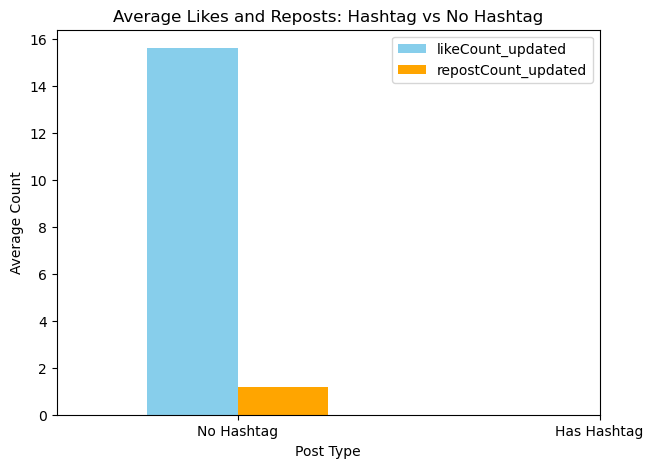

In [71]:
import matplotlib.pyplot as plt

# Group by hashtag presence, calculate averages
avg_metrics = merged_df.groupby("has_hashtag")[["likeCount_updated", "repostCount_updated"]].mean()

# Plot
avg_metrics.plot(
    kind="bar",
    figsize=(7,5),
    title="Average Likes and Reposts: Hashtag vs No Hashtag",
    color=["skyblue","orange"]
)

plt.xticks([0,1], ["No Hashtag", "Has Hashtag"], rotation=0)
plt.ylabel("Average Count")
plt.xlabel("Post Type")
plt.show()




In [72]:
print(merged_df.columns.tolist())
print(merged_df["has_hashtag"].value_counts())


['uri', 'cid', 'createdAt', 'text', 'author_handle', 'author_did', 'author_displayName', 'likes', 'reposts', 'replies', 'engagement', 'has_hashtag', 'likeCount_updated', 'repostCount_updated', 'replyCount_updated']
has_hashtag
True    10
Name: count, dtype: int64


In [74]:
merged_df["has_hashtag"] = merged_df["text"].str.contains(r"#\w+", na=False)


In [75]:
print(merged_df["has_hashtag"].value_counts())


has_hashtag
False    6
True     4
Name: count, dtype: int64


<Axes: xlabel='has_hashtag'>

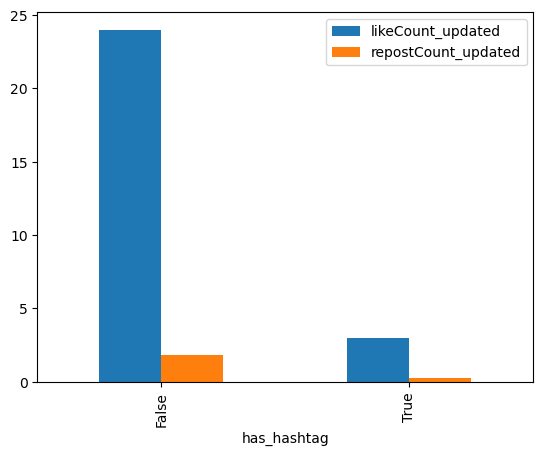

In [76]:
avg_metrics = merged_df.groupby("has_hashtag")[["likeCount_updated", "repostCount_updated"]].mean()
avg_metrics.plot(kind="bar")


I asked ChatGPT why I wasn't seeing a bar for both hashtags and no-hashtags. And it fixed it for me by following the prompts above. 

What this graph is telling me, is that my hypothesis is disproven, at least based off the data I collected. Like counts and repost counts were still higher, even witout hashtags. 